In [1]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

svg_path_data = "M349 -680L-15 -5L-16 0H66L161 -178H422L432 0H510L511 -5L466 -680ZM394 -615H396L417 -250H199Z"

def parse_svg_path(path_data):
    commands = {'M': Path.MOVETO, 'L': Path.LINETO, 'H': Path.LINETO, 'V': Path.LINETO, 'Z': Path.CLOSEPOLY}
    path_segments = []
    current_pos = (0, 0)
    
    tokens = path_data.split()
    i = 0
    while i < len(tokens):
        command = tokens[i][0]
        if command in 'MLHVZ':
            points = []
            i += 1
            while i < len(tokens) and not tokens[i][0].isalpha():
                points.append(float(tokens[i]))
                i += 1
            if command == 'H':
                points = [(points[0], current_pos[1])]
            elif command == 'V':
                points = [(current_pos[0], points[0])]
            elif command == 'Z':
                points = [current_pos]
            else:
                points = [(points[j], points[j+1]) for j in range(0, len(points), 2)]
            for point in points:
                path_segments.append((commands[command], point))
                if command != 'Z':
                    current_pos = point
        else:
            raise ValueError(f"Unknown command {command}")

    return path_segments

def draw_svg_path(path_data):
    path_segments = parse_svg_path(path_data)
    path_data = [segment[1] for segment in path_segments]
    path_codes = [segment[0] for segment in path_segments]

    path = Path(path_data, path_codes)
    patch = patches.PathPatch(path, facecolor='none', edgecolor='black', lw=2)

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.add_patch(patch)
    ax.set_xlim(-100, 600)
    ax.set_ylim(-700, 100)
    ax.set_aspect('equal')
    plt.gca().invert_yaxis()  # Invert the y-axis to match the SVG coordinate system
    plt.show()

draw_svg_path(svg_path_data)

ValueError: could not convert string to float: '-680L-15'

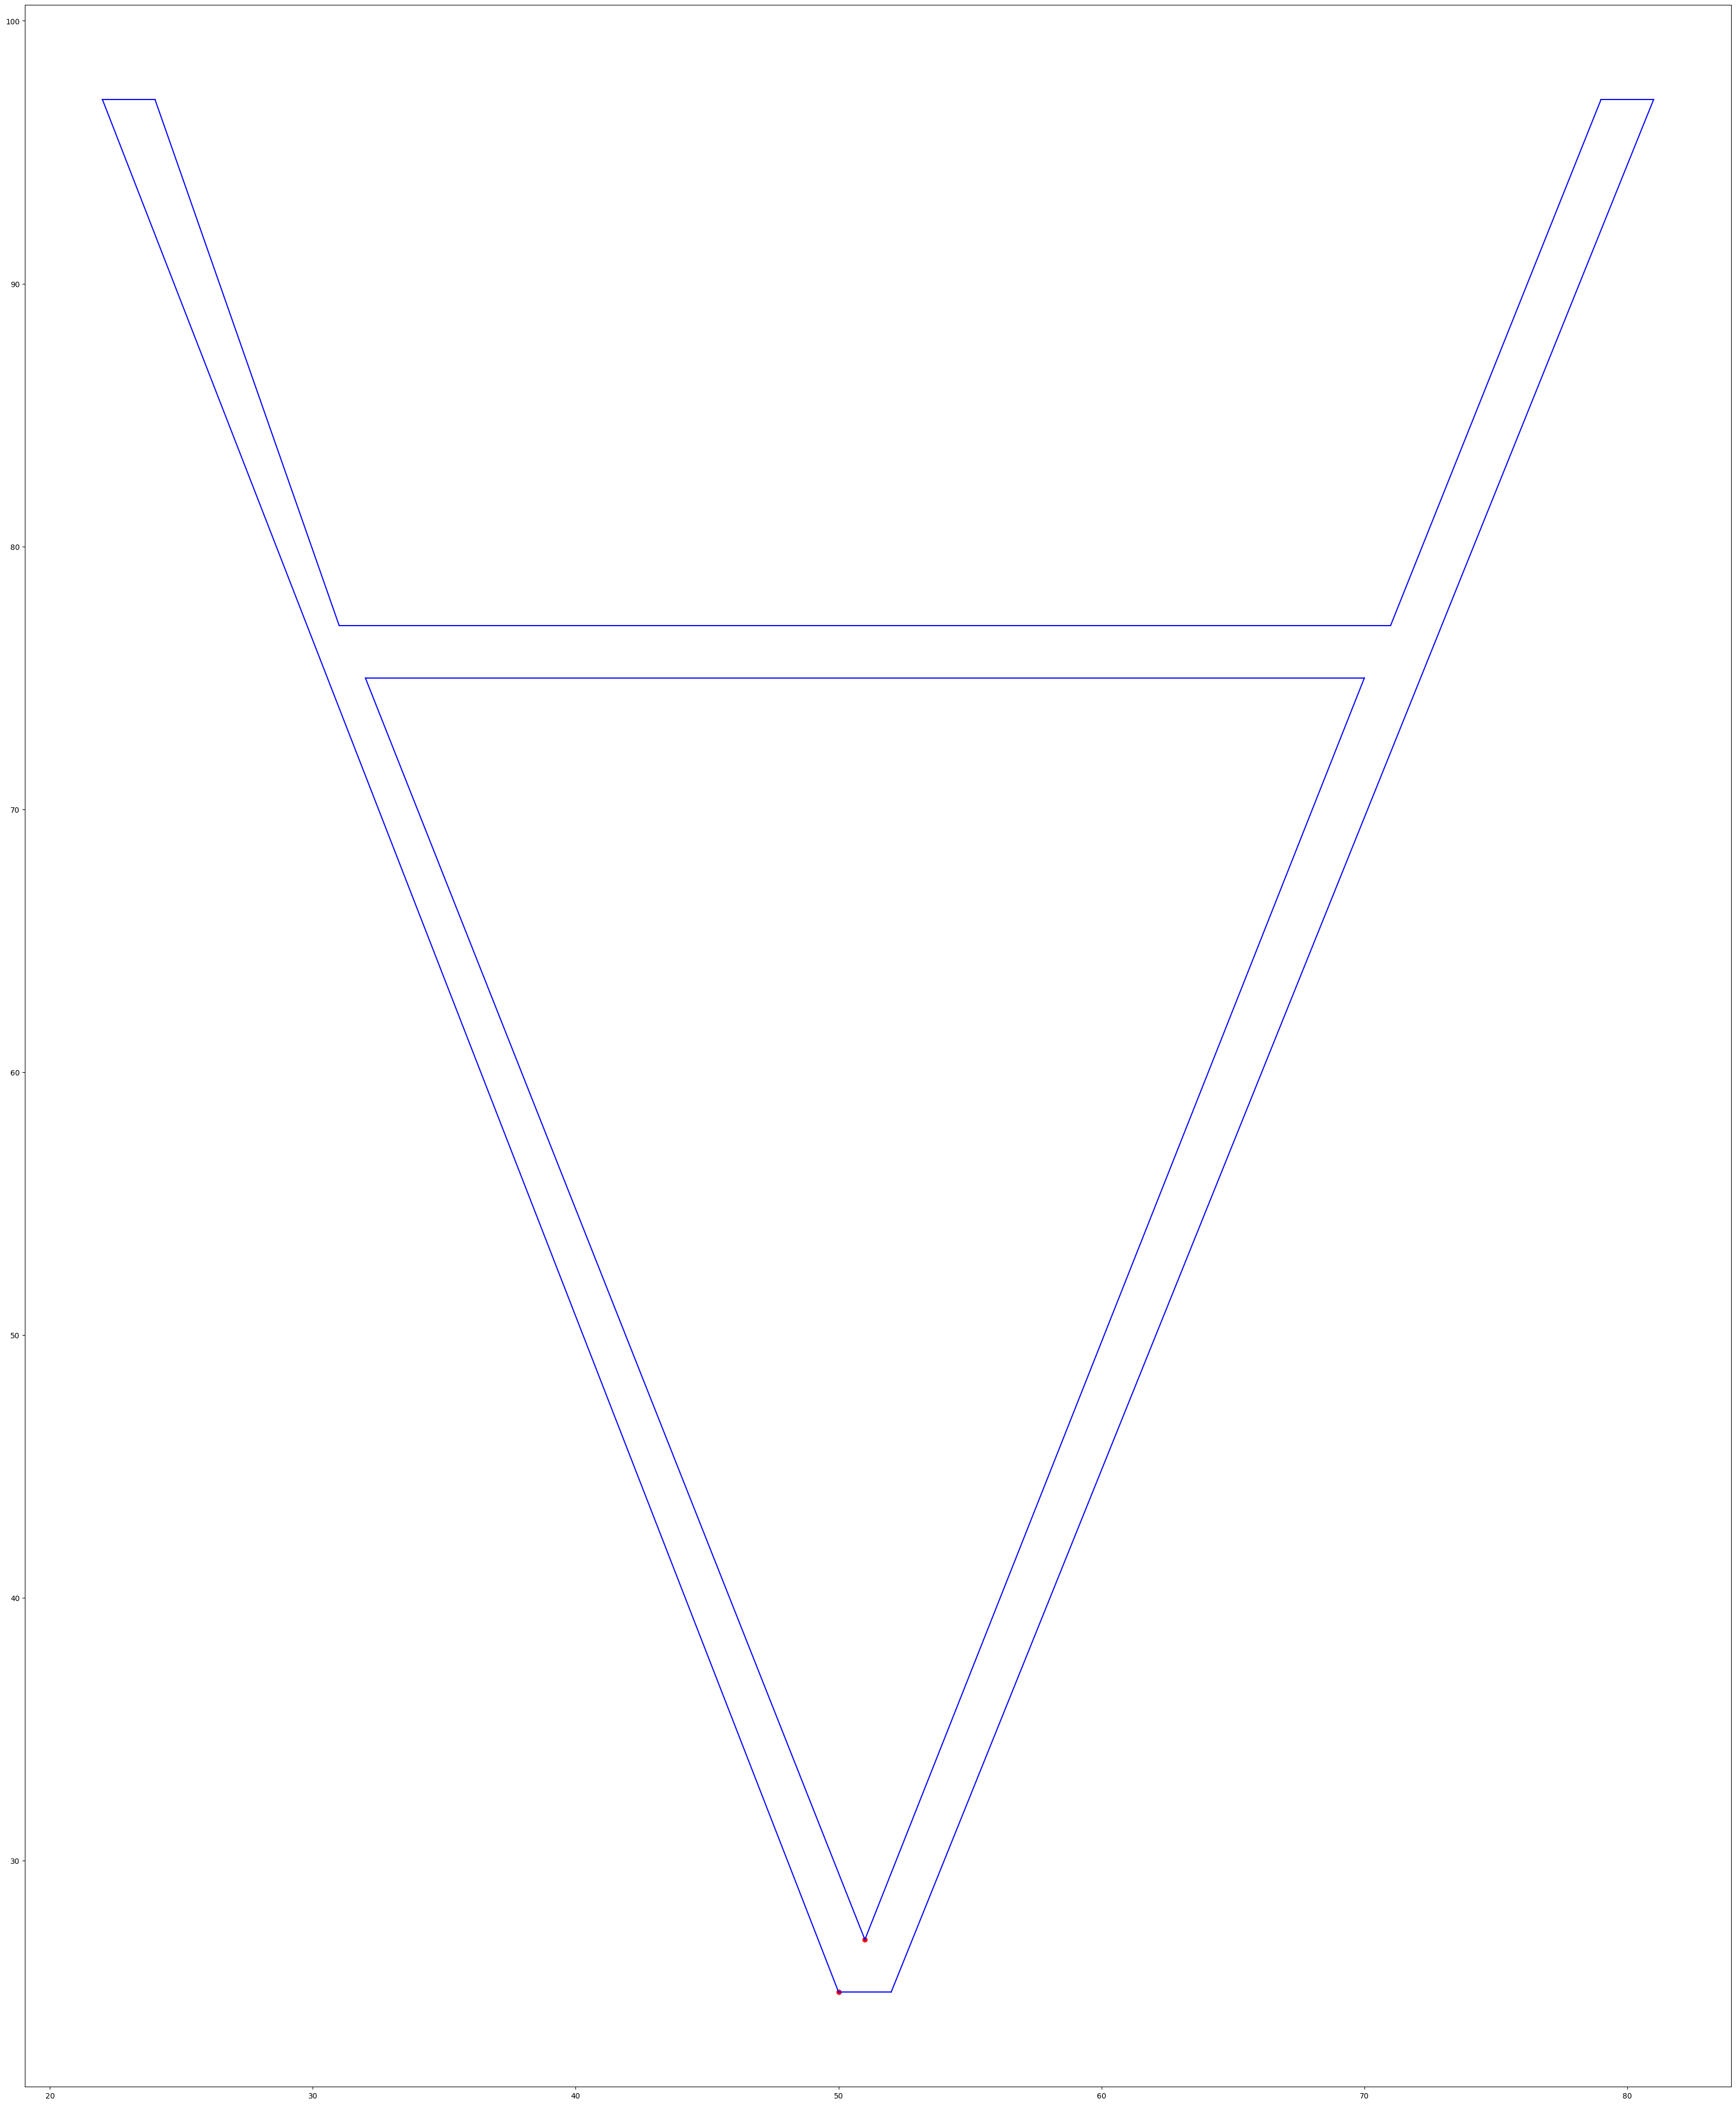

In [3]:
import torch
import matplotlib.pyplot as plt

# Пример тензора

tensor = torch.tensor([[[ 1, 50, 25,  0,  0,  0,  0, 50, 25],
          [ 2, 50, 25,  0,  0,  0,  0, 52, 25],
          [ 2, 52, 25,  0,  0,  0,  0, 81, 97],
          [ 2, 81, 97,  0,  0,  0,  0, 79, 97],
          [ 2, 79, 97,  0,  0,  0,  0, 71, 77],
          [ 2, 71, 77,  0,  0,  0,  0, 31, 77],
          [ 2, 31, 77,  0,  0,  0,  0, 24, 97],
          [ 2, 24, 97,  0,  0,  0,  0, 22, 97],
          [ 2, 22, 97,  0,  0,  0,  0, 50, 25],
          [ 1, 51, 27,  0,  0,  0,  0, 51, 27],
          [ 2, 51, 27,  0,  0,  0,  0, 32, 75],
          [ 2, 32, 75,  0,  0,  0,  0, 70, 75],
          [ 2, 70, 75,  0,  0,  0,  0, 51, 27]]])

# Функция для рисования буквы
def draw_letter(tensor):
    fig, ax = plt.subplots(figsize=(50, 50))

    for command in tensor[0]:
        cmd = command[0].item()
        x0, y0 = command[1].item(), command[2].item()
        x1, y1 = command[3].item(), command[4].item()
        x2, y2 = command[5].item(), command[6].item()
        x3, y3 = command[7].item(), command[8].item()

        if cmd == 1:  # Move command
            ax.plot(x0, y0, 'ro')  # Mark the point with a red dot
        elif cmd == 2:  # Line command
            ax.plot([x0, x3], [y0, y3], 'b-')  # Draw a blue line

    ax.set_aspect('equal')
    plt.show()

# Вызов функции для рисования
draw_letter(tensor)

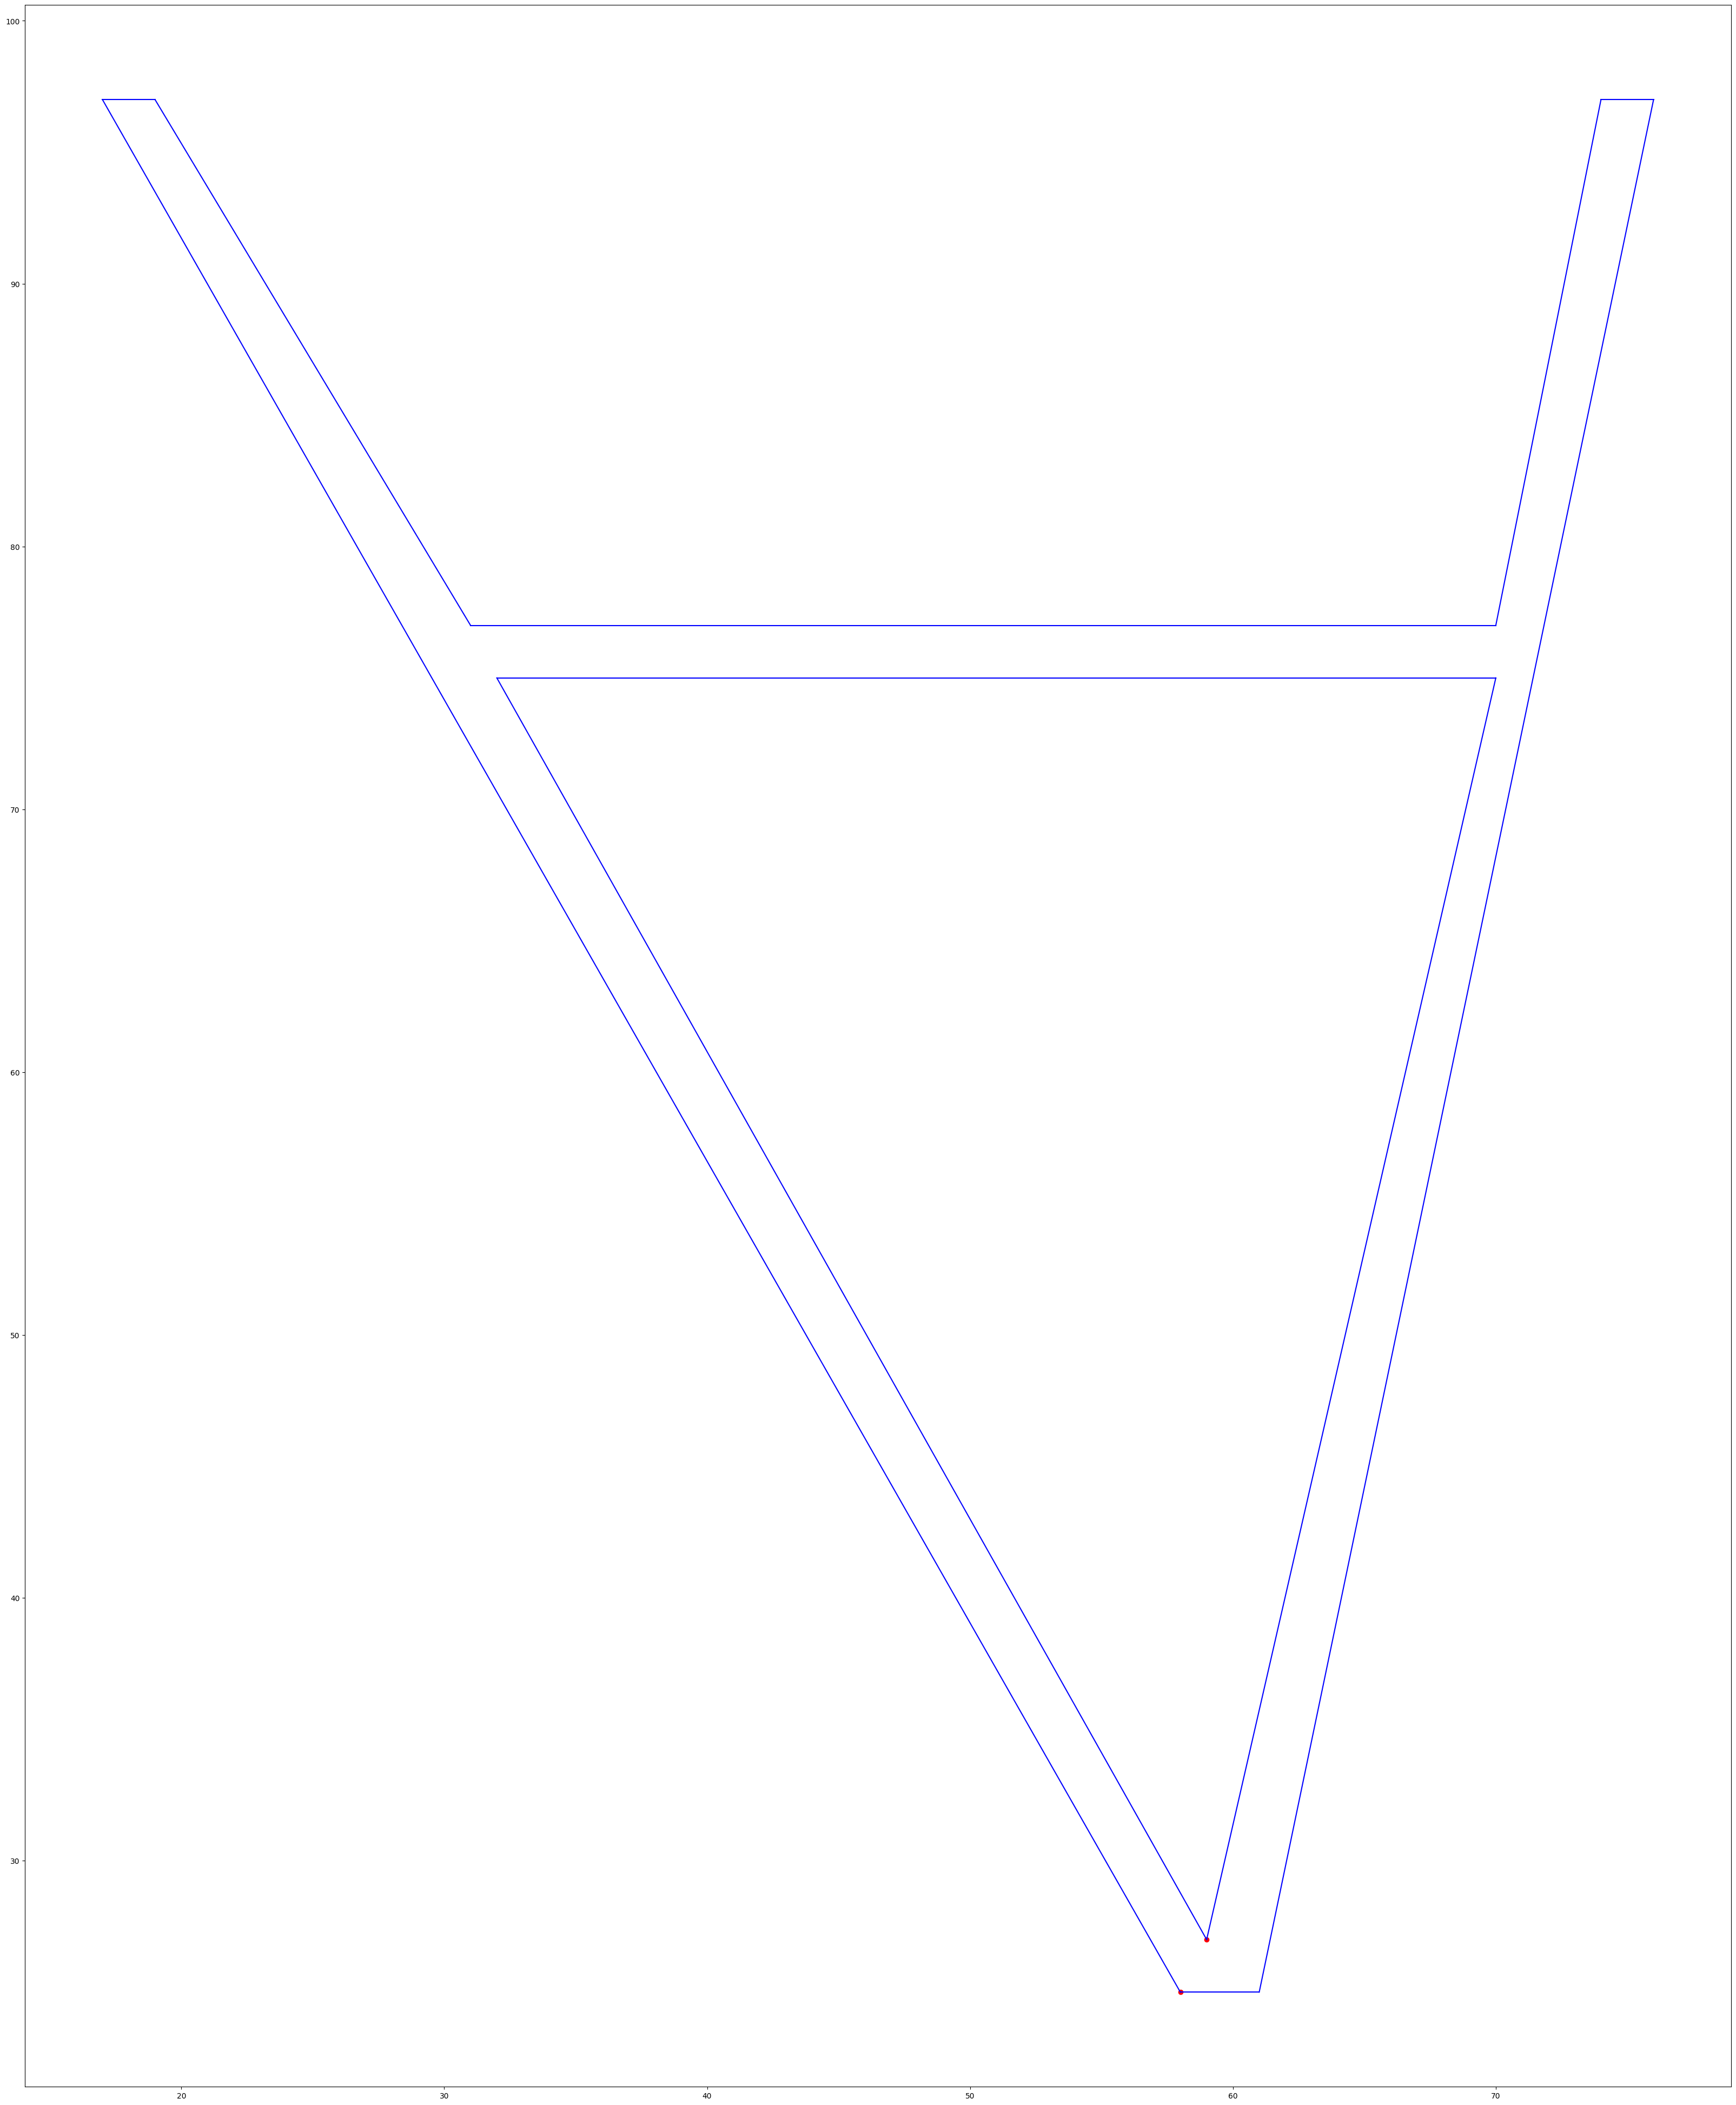

In [5]:
import torch
import matplotlib.pyplot as plt

# Пример тензора

tensor = torch.tensor([[[ 1, 58, 25,  0,  0,  0,  0, 58, 25],
          [ 2, 58, 25,  0,  0,  0,  0, 61, 25],
          [ 2, 61, 25,  0,  0,  0,  0, 76, 97],
          [ 2, 76, 97,  0,  0,  0,  0, 74, 97],
          [ 2, 74, 97,  0,  0,  0,  0, 70, 77],
          [ 2, 70, 77,  0,  0,  0,  0, 31, 77],
          [ 2, 31, 77,  0,  0,  0,  0, 19, 97],
          [ 2, 19, 97,  0,  0,  0,  0, 17, 97],
          [ 2, 17, 97,  0,  0,  0,  0, 58, 25],
          [ 1, 59, 27,  0,  0,  0,  0, 59, 27],
          [ 2, 59, 27,  0,  0,  0,  0, 32, 75],
          [ 2, 32, 75,  0,  0,  0,  0, 70, 75],
          [ 2, 70, 75,  0,  0,  0,  0, 59, 27]]])
# Функция для рисования буквы
def draw_letter(tensor):
    fig, ax = plt.subplots(figsize=(50, 50))

    for command in tensor[0]:
        cmd = command[0].item()
        x0, y0 = command[1].item(), command[2].item()
        x1, y1 = command[3].item(), command[4].item()
        x2, y2 = command[5].item(), command[6].item()
        x3, y3 = command[7].item(), command[8].item()

        if cmd == 1:  # Move command
            ax.plot(x0, y0, 'ro')  # Mark the point with a red dot
        elif cmd == 2:  # Line command
            ax.plot([x0, x3], [y0, y3], 'b-')  # Draw a blue line

    ax.set_aspect('equal')
    plt.show()

# Вызов функции для рисования
draw_letter(tensor)